In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('SCF.csv', sep = ',')

In [4]:
X = df[['Spots', 'Central_PA', 'Width', '2_I_speed', '2_F_speed',
       '2_20R_speed', 'MPA', 'Background_energy',
       'Peak_energy', 'Integrated_energy', 'Dur']]

In [5]:
Y = df['K_energy']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [7]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
reg.score(X_test, y_test)

The mean squared error (MSE) on test set: 1906900799655566501579895543741653361200882521360162862661632.0000


0.547285977706192

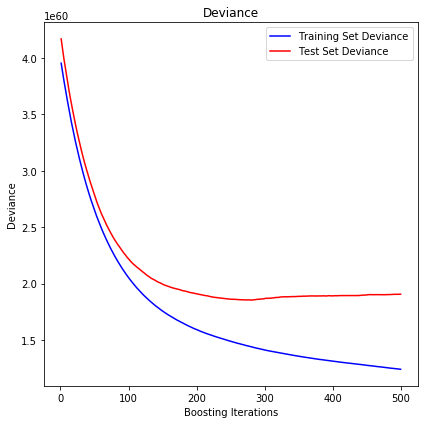

In [10]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [11]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.14184600229280664

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state = 0)
gbrt.fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.5525739613806296